In [ ]:
# OCR - pre processing techiniques
import pytesseract
from pytesseract import Output

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import re

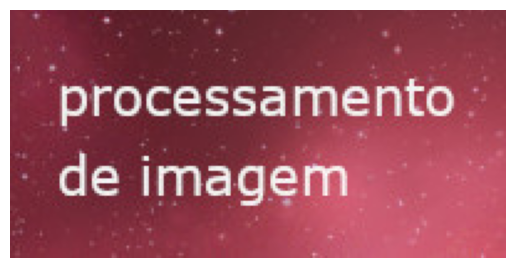

In [ ]:
# 전처리기술1 : 흑백처리
img = Image.open('./content/img-process.jpg')
img_cv = np.array(img)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
img_cv.shape

(100, 200, 3)

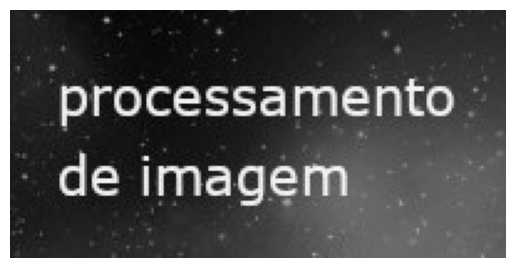

In [8]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# 흑백처리 했더니 이미지 크기가 줄었다 (분석 시간이 줄고 메모리 사용량이 줄어듬)
gray.shape

(100, 200)

In [ ]:
# 전처리기술2 : Thresholding (Binarization) 이진화
# Simple Thresholding
# Otsu method
# Adaptive Thresholding
# Gaussian Adaptive Thresholding
# Median Adaptive Thresholding
# Bilateral Filtering

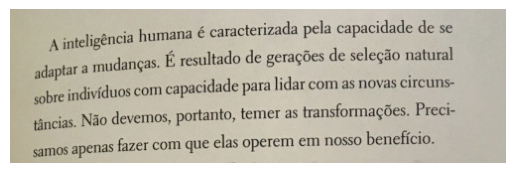

In [12]:
# Simple Thresholding
img = Image.open('./content/page-book.jpg')
img_cv = np.array(img)

plt.imshow(img_cv, cmap='gray')
plt.axis('off')
plt.show()

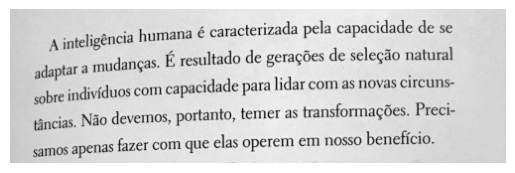

In [13]:
# 흑백처리
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

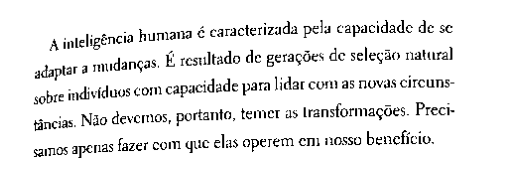

In [ ]:
# 간단한 이진화
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)        # 127 이하면 0 (검정) 으로 만든다, 180보다 크면 255(흰색) 으로 만든다

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [15]:
value

127.0

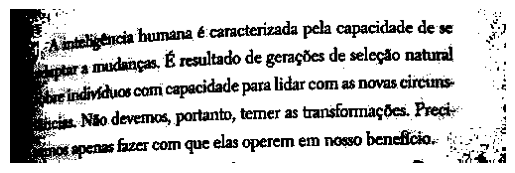

In [ ]:
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)        # 180 이하면 0 (검정) 으로 만든다, 180보다 크면 255(흰색) 으로 만든다

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

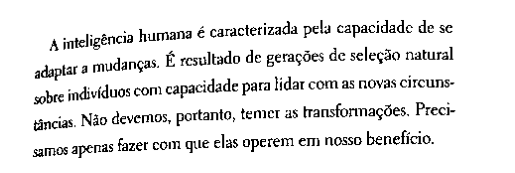

In [17]:
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)        # 140 이하면 0 (검정) 으로 만든다, 180보다 크면 255(흰색) 으로 만든다

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()